In [79]:
import homographies_2D as homographies_2D
import fonctions_image
from matplotlib import pyplot as plt
import numpy as np
import cv2
import importlib
importlib.reload(homographies_2D)
importlib.reload(fonctions_image)
from homographies_2D import *
from fonctions_image import *

Found 5 valid pieces
Piece areas: [24589, 34841, 295310, 27553, 33625]


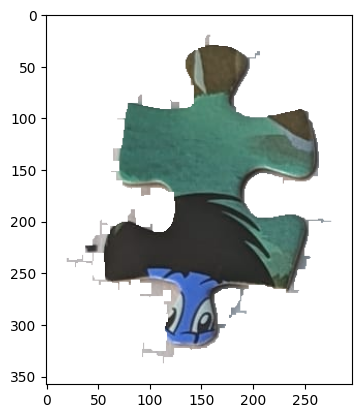

In [80]:
photo_pieces= cv2.imread('/Users/martindrieux/Documents/GitHub/INF573_Puzzle/solver_adrien/WhatsApp Image 2024-12-15 at 11.34.37.jpeg')
puzzle= cv2.imread('/Users/martindrieux/Documents/GitHub/INF573_Puzzle/nos_puzzles/yakari.jpg')
pieces=extract_pieces(photo_pieces)
piece1=pieces[1]
piece_im=piece1['matching_image']
plt.imshow(piece1['matching_image'])


Matches and their distances:
Match 1: Distance = 104.19
Match 2: Distance = 109.93
Match 3: Distance = 244.38
Match 4: Distance = 253.19
Match 5: Distance = 144.92
Match 6: Distance = 147.68
Match 7: Distance = 151.74
Match 8: Distance = 154.10
Match 9: Distance = 168.47
Match 10: Distance = 177.86
(2.424671862332275, -0.0751574469110171, array([625.53748894, 187.89210911]))
(2.424671862332275, -0.8422705465099216, array([1755.54415767,  240.6619957 ]))


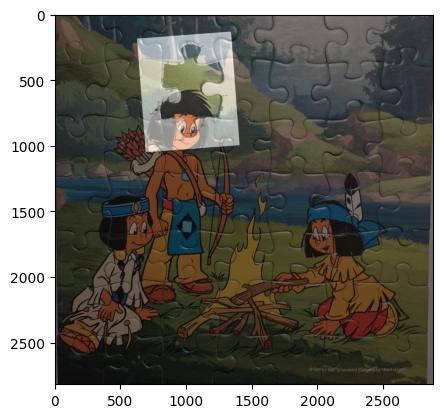

In [81]:
sift=cv2.SIFT_create()
kp_im, des_im=calculate_keypoints_sift(sift,piece1)

kp_puzzle, des_puzzle=sift.detectAndCompute(puzzle, None)
matches=calculate_matches(piece1,puzzle,kp_im,des_im, kp_puzzle,des_puzzle)


src_points = np.array([kp_im[m.queryIdx].pt for m in matches])
dst_points = np.array([kp_puzzle[m.trainIdx].pt for m in matches])


#s, theta, t=estimate_rigid_transform(src_points, dst_points)
Hs=homography_unknown_scale(kp_im, kp_puzzle, matches )
s, theta, t=decompose_similarity_homography(Hs)

print(decompose_similarity_homography(Hs))
print(decompose_similarity_homography(Hb))
H=cv2.findHomography(src_points, dst_points, cv2.RANSAC, 5.0)[0]

show_homography_on_puzzle(piece_im, puzzle, Hs)


## knwon scale

Matches and their distances:
Match 1: Distance = 188.80
Match 2: Distance = 286.71
Match 3: Distance = 298.97
Match 4: Distance = 257.47
Match 5: Distance = 262.28
Match 6: Distance = 268.32


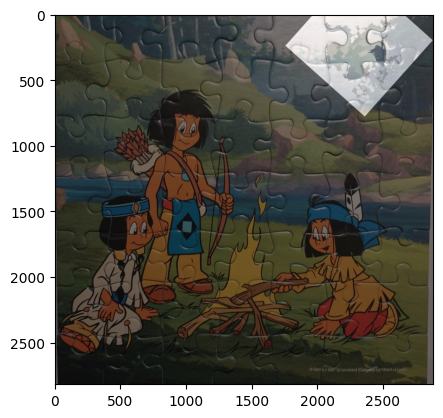

In [78]:
piece2=pieces[0]
piece_im2=piece2['matching_image']
kp_im2, des_im2=calculate_keypoints_sift(sift,piece2)
matches2=calculate_matches(piece2,puzzle,kp_im2,des_im2, kp_puzzle,des_puzzle)
src_points2 = np.array([kp_im2[m.queryIdx].pt for m in matches2])
dst_points2 = np.array([kp_puzzle[m.trainIdx].pt for m in matches2])

Hb=homography_known_scale(kp_im2, kp_puzzle, matches2, s)

show_homography_on_puzzle(piece_im2, puzzle, Hb)

## approch naive

(1.609028423578921, -2.041665263802572, array([2330.13057315,  651.08913432]))
(2.424671862332275, -0.8422705465099216, array([1755.54415767,  240.6619957 ]))


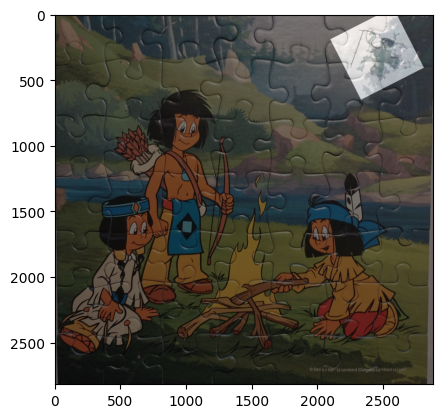

In [82]:
Hs2=homography_unknown_scale(kp_im2, kp_puzzle, matches2 )
s2, theta2, t2=decompose_similarity_homography(Hs2)
print(decompose_similarity_homography(Hs2))
print(decompose_similarity_homography(Hb))
show_homography_on_puzzle(piece_im2, puzzle, Hs2)
